# Using Metadata to Approximate Publication Dates for Subject Specific Texts

In this examination, I would like to use the API to get a sense of how time periods are represented in the Project Gutenberg corpus.  An investigation of this sort could potentially frame and contextualize future large-scale text analysis by subject or era.  A greater number of texts in particular years, for example, might mean a relatively wider range of language or vocabulary, as compared with other periods. Meanwhile, the popularity of a particular genre at a particular time could reveal limitations to a corpus bounded by subject or open up research questions about historical contingencies.

As original publication date is not explicitly listed in PG metadata, I will instead attempt to approximate literary eras with author birth and death dates, which are both included.  I will thus employ three different approaches to modeling, first by birth year, then by death year, then by lifetime.  I will synthesize these three approaches in my conclusion.

Roughly, I hypothesize that the works in the PG collection are more heavily concentrated in the late 19th and early 20th century, across genres.  An increase in publishing and the boundary of public domain falling in the 1920s, I expect there to be a greater volume overall of the most recent, legally publishable works.  I am also interested in the variation across genres, which I do not expect to be all that significant.

I will begin by importing the various python libraries I need for this examination.

In [3]:
import requests
import json
import random
import pandas as pd
import matplotlib.pyplot as pp
import numpy as np
import seaborn as sb

Now I will import the Library of Congress Subject Heading list from the API.

In [4]:
baseURL = "http://corpus-db.org"

In [5]:
allSubjects = requests.get(baseURL + "/api/subjects").text

In [6]:
allSubjects = json.loads(allSubjects)

For the purposes of this examination, I will be looking exlusively at the best represented subject headings in the Project Gutenberg collection.  Here I create a list with the seven largest categories.

In [7]:
sampleSubjects = allSubjects[:7]

Below is a function definition that will modify a passed in "dateList" parameter and fill it with the available birth years of all authors whose works are under a given subject heading.

In [1]:
def getDates (subject,dateList,kind):
    subjectResponse = requests.get(baseURL + "/api/subject/" + subject)
    subjectset = json.loads(subjectResponse.text)
    for book in subjectset:
        if kind == 'birth':
            if book['authoryearofbirth'] != '':
                dateList.append(int(book['authoryearofbirth']))
        if kind == 'death':
            if book['authoryearofdeath'] != '':
                dateList.append(int(book['authoryearofdeath']))
        if kind == 'both':
            if book['authoryearofbirth'] != '' and book['authoryearofdeath'] != '':
                templist = list(range(int(book['authoryearofbirth']), int(book['authoryearofdeath'])))
                for temp in templist:
                    dateList.append(int(temp))

Here I use the function to create a histogram of "Fiction," the first genre in the list.

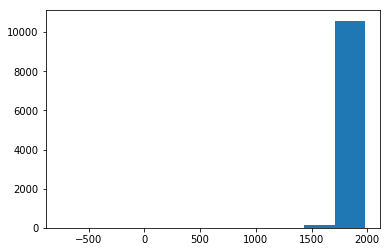

In [8]:
authorDates = []
getDates('Fiction', authorDates,'birth')
authorDates = list(filter(None,authorDates))
pp.hist(authorDates)
pp.show()

It doesn't appear all that descriptive.  I'll now use the getDates function on the other six subjects in my list to determine how I might refine this visualization.

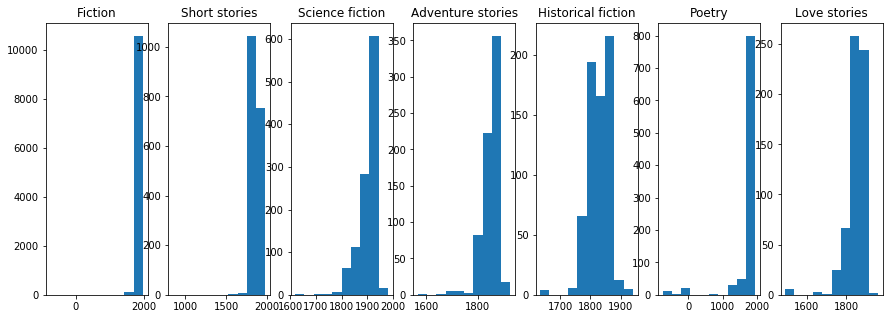

In [18]:
fig, axs = pp.subplots(1, 7)
fig.set_figheight(5)
fig.set_figwidth(15)
i = 0
for item in sampleSubjects:
    authorDates = []
    getDates(item[0],authorDates,'birth')
    authorDates = list(filter(None,authorDates))
    axs[i].hist(authorDates)
    axs[i].title.set_text(item[0])
    i = i+1

Contrary to my hypothesis, there is significant variation between genres, but I still might be able to illustrate meaningful data by focusing on a couple hundred year window between 1700 and 1950.  It might also make sense to alter some other parameters like bin number and "density" to reflect poportion rather than absolute count of book in a given period.  Below I return to fiction to see what sort of visualisation this might yield.

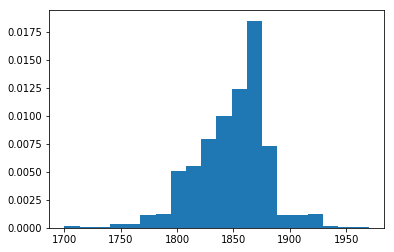

In [26]:
authorDates = []
getDates('Fiction', authorDates,'birth')
authorDates = list(filter(None,authorDates))
pp.hist(authorDates,bins=20,density = True, range=[1700,1970])
pp.show()

And here is the list of genres overlayed on one another to see relative concentrations by date.

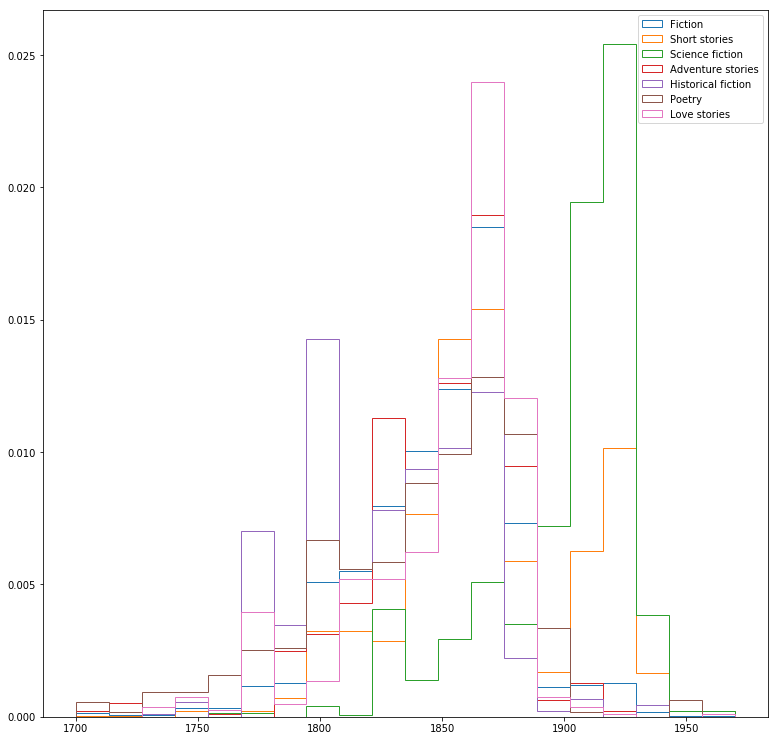

In [23]:
legendItems = []
pp.figure(figsize=(13,13))
for item in sampleSubjects:
    authorDates = []
    name = item[0]
    legendItems.append(name)
    getDates(item[0],authorDates,'birth')
    authorDates = list(filter(None,authorDates))
    pp.hist(authorDates,bins=20,density = True, histtype='step', fill=False, range=[1700,1970])
pp.legend(legendItems)

There do seem to be peaks and troughs.  This could be somewhat representative of the number of texts under each subject heading, but there do seem to be some patterns we could speculate about.  Science fiction authors, for example, tend to be born later, near the beginning of the 20th century, which is perhaps reflective of the popularity and definition of that genre in the 20th century.  The birth dates of historical fiction authors, on the author hand, seem to peak earlier, around the early 19th century.  In doing so, authors from this genre stand somewhat apart from authors of other genres on this list.

Let's see if we get similar results from our other methods.  What can we learn from death dates?

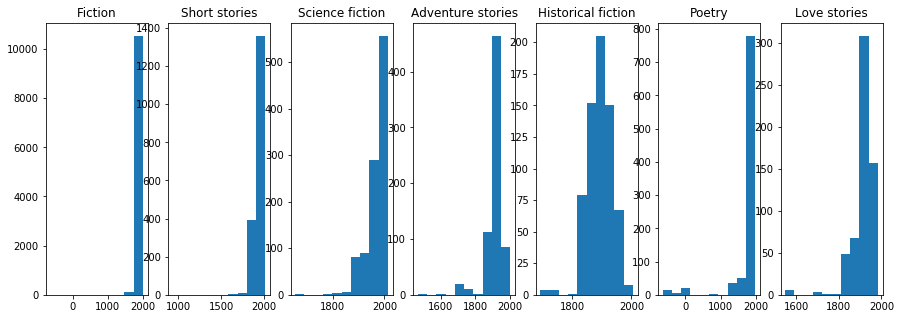

In [19]:
fig, axs = pp.subplots(1, 7)
fig.set_figheight(5)
fig.set_figwidth(15)
i = 0
for item in sampleSubjects:
    authorDates = []
    getDates(item[0],authorDates,'death')
    authorDates = list(filter(None,authorDates))
    axs[i].hist(authorDates)
    axs[i].title.set_text(item[0])
    i = i+1

This first visualization appears to magnify many of the patterns observed with the birth dates.  There is more potential for error here as well.  A historical increase in life expectancy means that authors who weren't necessarily born around the same time may still very well die around the same time.  As a proxy for publication date then, this could pose some problems.

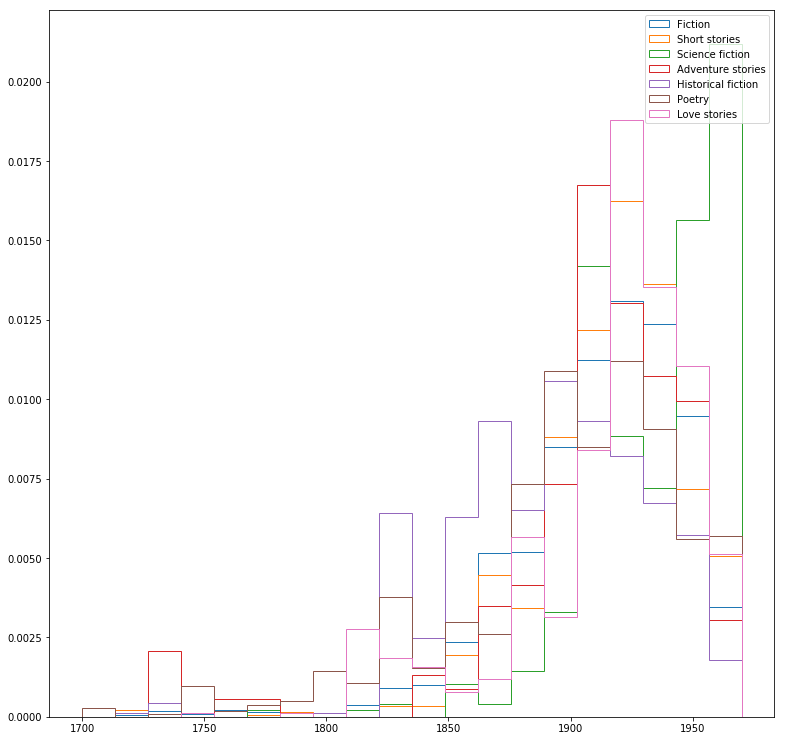

In [24]:
legendItems = []
pp.figure(figsize=(13,13))
for item in sampleSubjects:
    authorDates = []
    name = item[0]
    legendItems.append(name)
    getDates(item[0],authorDates,'death')
    authorDates = list(filter(None,authorDates))
    pp.hist(authorDates,bins=20,density = True, histtype='step', fill=False, range=[1700,1970])
pp.legend(legendItems)

In this visualization, however, there are perhaps moments the PG corpus signals are the end of a literary era.  With death dates, we know that authors aren't going to publishing further works (unless posthumously) and thus when the chart indicates that many authors of adventure stories finish their bodies of work in the early 20th century, this could be read as the decline of a genre.

Finally, I perform an examination of lifetime, plotting a range of years where a certain number of authors in a particular genre were alive.

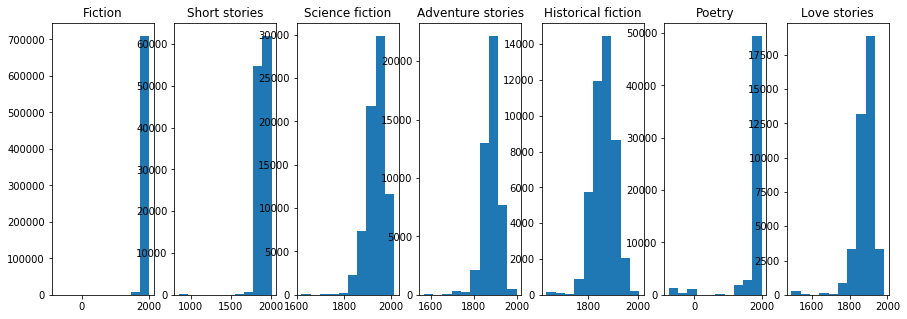

In [20]:
fig, axs = pp.subplots(1, 7)
fig.set_figheight(5)
fig.set_figwidth(15)
i = 0
for item in sampleSubjects:
    authorDates = []
    getDates(item[0],authorDates,'both')
    authorDates = list(filter(None,authorDates))
    axs[i].hist(authorDates)
    axs[i].title.set_text(item[0])
    i = i+1

Though using more data points and having greater potential for error, these visualizations present a more gradual rise and fall that may better capture authors' active years.

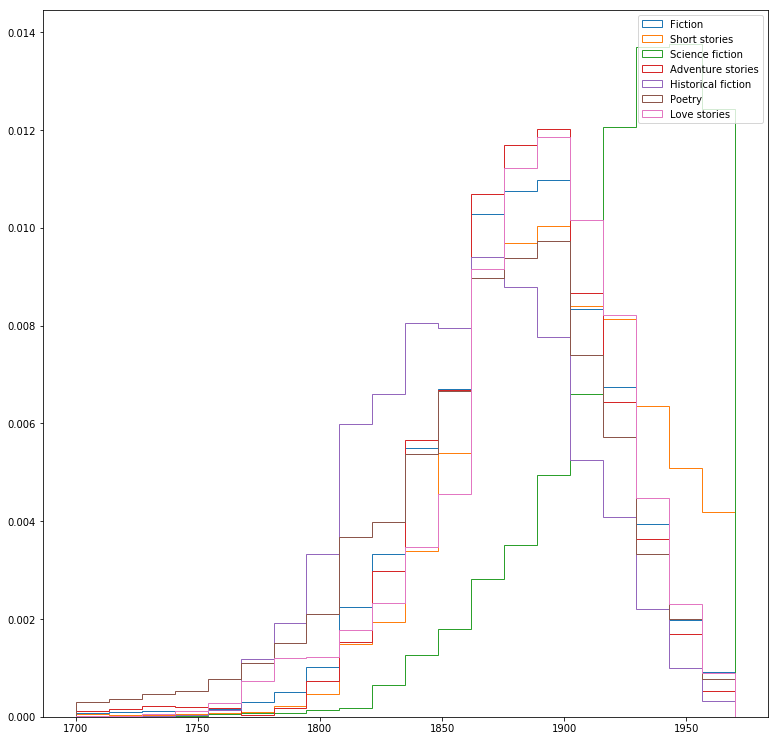

In [25]:
legendItems = []
pp.figure(figsize=(13,13))
for item in sampleSubjects:
    authorDates = []
    name = item[0]
    legendItems.append(name)
    getDates(item[0],authorDates,'both')
    authorDates = list(filter(None,authorDates))
    pp.hist(authorDates,bins=20,density = True, histtype='step', fill=False, range=[1700,1970])
pp.legend(legendItems)

We see the above patterns once more reflected in this visualization, such as the meteoric rise of science fiction at the beginning of the 20th century.

<h1> Conclusions

These visualizations potentially illustrate two phenomena: the temporal outline of the Project Gutenberg database and the changing relative presence of genre over time.  In service of the former, I have attempted three different approaches to create a proxy for original publication date of PG texts on a large scale.  Each offers a different lens onto the concentrations of genre-specific works from particular years in the PG database.  In service of the latter, I have made one further leap, taking the PG database and the Library of Congress subject headings to be indicators of historical cultural trends for genre popularity.  In some cases, I believe the data guides certain intuitions.  Prior to the 20th century, historical fiction was more popular than science fiction.  Other results might prompt further questions.  What accounts for the decline in adventure stories?  Does this mark a cultural trend or does it reflect the definition of the genre?  A text by text analysis might give a more nuanced picture of adventure stories contained in the PG corpus.

In the context of this examination, I was surprised by the prominence of works from the early 19th century and from other premodern historical eras.  I was also struck by the visible variation between genres.  While some patterns held across different subject headings, some subjects stood apart, as discussed above.  This variation presents further research questions into specific synchronicities or differences, examining in what cases and how the texts in the PG corpus reflect literary change over time.